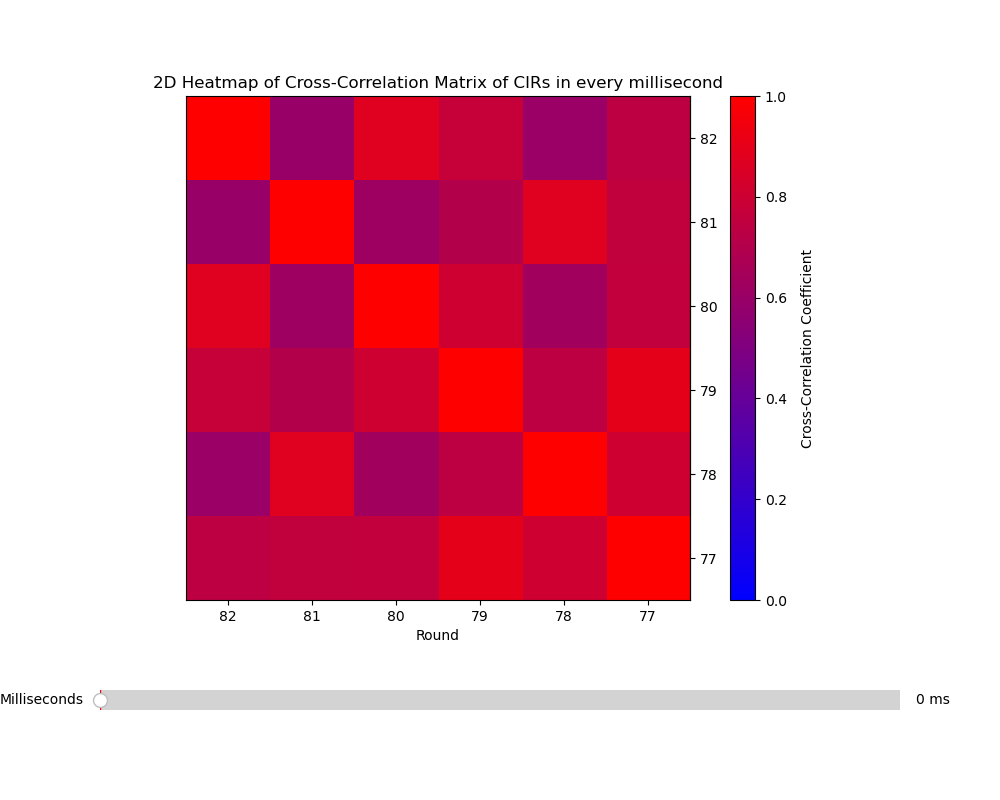

IndexError: index 1000 is out of bounds for axis 2 with size 1000

In [ ]:
#%%

%matplotlib widget
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.widgets import Slider
import os



#Inforamtionen
load_path = "/media/student/SEW/Bearbeitet_Data/Rx1/Tag1_Scenario1_AGVHorizontal/"
rounds = set()
round_numbers = [77,78,79,80,81,82]
second = 2
data = {}
data_db = {}


#die Daten für bestimmte Round und Zeit herunterladen
for round_number in round_numbers:
   
 filename = f"Round_{round_number}_AP_1_RF_0_Sec_{second}.mat"
 full_filename = os.path.join(load_path,filename)
 mat = scipy.io.loadmat(full_filename)
 cirs_data = mat["cirs"]
 data[filename] = cirs_data
 #print(f"Attempting to load file: {full_filename}")

#wie viele Rounds in diesem Ordner
for filename in os.listdir(load_path):
   r = int (filename.split("_")[1])
   rounds.add(r)
rounds = list(rounds)
rounds.sort()
#print(data)
#print(rounds)

# dB berechnen
for key, value in data.items():
    data_db[key] = 10 * np.log10(np.abs(value))
    

data_array = np.array(list(data_db.values()))
#print(f'data_db',data_array)

num_milliseconds = data_array.shape[2]

corr = np.zeros((len(round_numbers), len(round_numbers), num_milliseconds))


# cross correlation berechnen
for t in range(num_milliseconds):

    #print (f'Millisecond:', t)
    
    for i in range(len(round_numbers)):
    
        #print(f'Round number:', round_number)
        
        data_i = data_array[i, :, t]
    
        for j in range(i, len(round_numbers)):
    
          #print(f'Round number:', round_number)
    
          
          data_j = data_array[j, :, t]

          corr_coef = np.corrcoef(data_i, data_j)
          #print(f'corr_coef',corr_coef)

          if i == j:
                corr[i, j, t] = corr_coef[0, 0]  # calculate correlation with itself
          else:
                corr[i, j, t] = corr_coef[0, 1]
                corr[j, i, t] = corr_coef[1, 0]

    #print (f'corr matrix', corr)
    
        


# Visualisierung
colors = [(0, 0, 1), (1, 0, 0)]  # blue to red
cmap_name = 'blue_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

# figur and axis
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(left=0.05, right=0.85, bottom=0.25)


t0 = 0
corr_t0 = corr[:, :, t0]
heatmap = ax.imshow(corr_t0, cmap=cm, vmin=0, vmax=1, aspect='equal')
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Cross-Correlation Coefficient', labelpad=10)

ax.set_title('2D Heatmap of Cross-Correlation Matrix of CIRs in every millisecond')
ax.set_xlabel('Round')
#ax.set_ylabel('Round')
ax.set_xticks(np.arange(len(round_numbers)))
#ax.set_yticks(np.arange(len(round_numbers)))
ax.set_xticklabels(round_numbers)
#ax.set_yticklabels(round_numbers)
ax.invert_xaxis()
#ax.invert_yaxis()

#secondary y axis on the right side
secax = ax.secondary_yaxis('right')
secax.set_ylabel('Round', rotation=-90, labelpad=15)
secax.set_yticks(np.arange(len(round_numbers)))
secax.set_yticklabels(round_numbers)
secax.set_ylim(min(round_numbers), max(round_numbers)) 
ax.invert_yaxis()


ax.yaxis.set_visible(False)

#  Slider 
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Milliseconds', 0, num_milliseconds, valinit=t0, valfmt='%d ms')

#Function for every ms
def update(val):
    t = int(slider.val)
    corr_t = corr[:, :, t]
    heatmap.set_data(corr_t)
    fig.canvas.draw_idle()


slider.on_changed(update)
plt.draw()
plt.show()

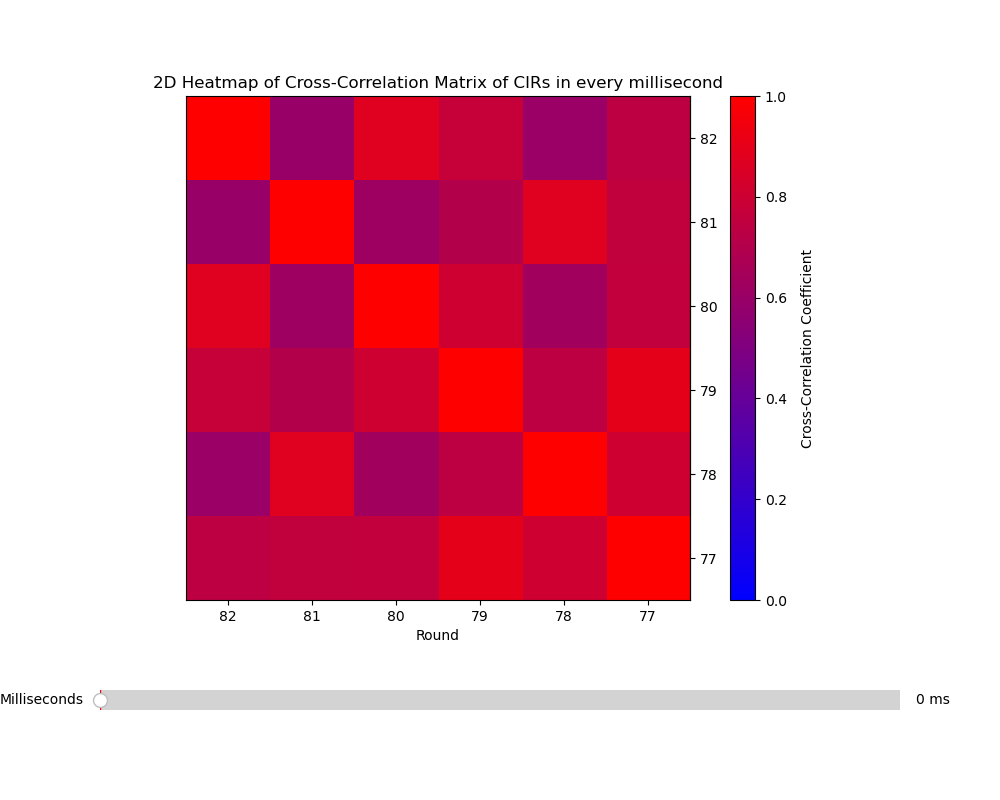

In [ ]:
#%%

%matplotlib widget
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.widgets import Slider
import os



#Inforamtionen
load_path = "/media/student/SEW/Bearbeitet_Data/Rx1/Tag1_Scenario1_AGVHorizontal/"
rounds = set()
round_numbers = [77,78,79,80,81,82]
second = 2
data = {}
data_db = {}


#die Daten für bestimmte Round und Zeit herunterladen
for round_number in round_numbers:
   
 filename = f"Round_{round_number}_AP_1_RF_0_Sec_{second}.mat"
 full_filename = os.path.join(load_path,filename)
 mat = scipy.io.loadmat(full_filename)
 cirs_data = mat["cirs"]
 data[filename] = cirs_data
 #print(f"Attempting to load file: {full_filename}")

#wie viele Rounds in diesem Ordner
for filename in os.listdir(load_path):
   r = int (filename.split("_")[1])
   rounds.add(r)
rounds = list(rounds)
rounds.sort()
#print(data)
#print(rounds)

# dB berechnen
for key, value in data.items():
    data_db[key] = 10 * np.log10(np.abs(value))
    

data_array = np.array(list(data_db.values()))
#print(f'data_db',data_array)

num_milliseconds = data_array.shape[2]

corr = np.zeros((len(round_numbers), len(round_numbers), num_milliseconds))


# cross correlation berechnen
for t in range(num_milliseconds):

    #print (f'Millisecond:', t)
    
    for i in range(len(round_numbers)):
    
        #print(f'Round number:', round_number)
        
        data_i = data_array[i, :, t]
    
        for j in range(i, len(round_numbers)):
    
          #print(f'Round number:', round_number)
    
          
          data_j = data_array[j, :, t]

          corr_coef = np.corrcoef(data_i, data_j)
          #print(f'corr_coef',corr_coef)

          if i == j:
                corr[i, j, t] = corr_coef[0, 0]  # calculate correlation with itself
          else:
                corr[i, j, t] = corr_coef[0, 1]
                corr[j, i, t] = corr_coef[1, 0]

    #print (f'corr matrix', corr)
    
        


# Visualisierung
colors = [(0, 0, 1), (1, 0, 0)]  # blue to red
cmap_name = 'blue_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

# figur and axis
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(left=0.05, right=0.85, bottom=0.25)


t0 = 0
corr_t0 = corr[:, :, t0]
heatmap = ax.imshow(corr_t0, cmap=cm, vmin=0, vmax=1, aspect='equal')
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Cross-Correlation Coefficient', labelpad=10)

ax.set_title('2D Heatmap of Cross-Correlation Matrix of CIRs in every millisecond')
ax.set_xlabel('Round')
#ax.set_ylabel('Round')
ax.set_xticks(np.arange(len(round_numbers)))
#ax.set_yticks(np.arange(len(round_numbers)))
ax.set_xticklabels(round_numbers)
#ax.set_yticklabels(round_numbers)
ax.invert_xaxis()
#ax.invert_yaxis()

#secondary y axis on the right side
secax = ax.secondary_yaxis('right')
secax.set_ylabel('Round', rotation=-90, labelpad=15)
secax.set_yticks(np.arange(len(round_numbers)))
secax.set_yticklabels(round_numbers)
secax.set_ylim(min(round_numbers), max(round_numbers)) 
ax.invert_yaxis()


ax.yaxis.set_visible(False)

#  Slider 
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Milliseconds', 0, num_milliseconds, valinit=t0, valfmt='%d ms')

#Function for every ms
def update(val):
    t = int(slider.val)-1
    corr_t = corr[:, :, t]
    heatmap.set_data(corr_t)
    fig.canvas.draw_idle()


slider.on_changed(update)
plt.draw()
plt.show()